In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def solve_lidDrivenCavity(Re, n, end_time, dt=0.001):
    # set up the grid
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    U = 1.0
    write_interval = 100  # Timesteps
    h = x[1] - x[0]
    nu = 1 / Re
    xx, yy = np.meshgrid(x, y)
    vort = np.zeros((n, n))
    psi = np.zeros((n, n))

    # Boundary conditions
    vort[:, -1] = -2 * U / h  # Top boundary condition

    # Time loop
    t = 0
    iter_count = 0
    s = 0
    run = True

    if run:
        vort_out, psi_out, u_out, v_out = [], [], [], []
        vort_residual_out, psi_residual_out, times = [], [], []

        while t < end_time:
            vort_old = vort.copy()
            psi_old = psi.copy()
            iter_count += 1
            t += dt
            
            # Vorticity update
            for i in range(1, n-1):
                for j in range(1, n-1):
                    vort[i, j] += dt * (
                        -(psi[i, j+1] - psi[i, j-1]) * (vort[i+1, j] - vort[i-1, j]) / (4 * h**2)
                        + (psi[i+1, j] - psi[i-1, j]) * (vort[i, j+1] - vort[i, j-1]) / (4 * h**2)
                        + nu * (vort[i+1, j] + vort[i-1, j] + vort[i, j+1] + vort[i, j-1] - 4 * vort[i, j]) / h**2
                    )

            # Boundary conditions
            vort[1:-1, 0] = 2 * (psi[1:-1, 0] - psi[1:-1, 1]) / h**2  # Bottom
            vort[1:-1, -1] = 2 * (psi[1:-1, -1] - psi[1:-1, -2]) / h**2 - 2 * U / h  # Top
            vort[0, 1:-1] = 2 * (psi[0, 1:-1] - psi[1, 1:-1]) / h**2  # Left
            vort[-1, 1:-1] = 2 * (psi[-1, 1:-1] - psi[-2, 1:-1]) / h**2  # Right
            
            # Stream function update (iterative solution of Poisson's equation)
            for i in range(1, n-1):
                for j in range(1, n-1):
                    psi[i, j] = 0.25 * (h**2 * vort[i, j] + psi[i+1, j] + psi[i-1, j] + psi[i, j+1] + psi[i, j-1])
            
            # Calculate velocities
            u = np.zeros((n, n))
            v = np.zeros((n, n))
            u[1:-1, 1:-1] = (psi[1:-1, 2:] - psi[1:-1, :-2]) / (2 * h)
            v[1:-1, 1:-1] = (psi[2:, 1:-1] - psi[:-2, 1:-1]) / (2 * h)
            u[:, -1] = U
            
            # Calculate residuals
            vort_residual = np.max(np.abs(vort - vort_old))
            psi_residual = np.max(np.abs(psi - psi_old))
            
            if iter_count % write_interval == 0:
                s += 1
                vort_out.append(vort.copy())
                psi_out.append(psi.copy())
                u_out.append(u.copy())
                v_out.append(v.copy())
                vort_residual_out.append(vort_residual)
                psi_residual_out.append(psi_residual)
                times.append(t)
                print(f'Calculating ... time = {t:.3f}')

    return vort_out, psi_out, u_out, v_out, vort_residual_out, psi_residual_out, times

In [6]:
n = 80
Re = [100, 400, 1000]
t = 10
dt = 0.001
vort_out, psi_out, u_out, v_out, vort_residual_out, psi_residual_out, times = [], [], [], [], [], [], []

for Re_ in Re:
    vort_out_, psi_out_, u_out_, v_out_, vort_residual_out_, psi_residual_out_, times_ = solve_lidDrivenCavity(Re_, n, t, dt)
    vort_out.append(vort_out_)
    psi_out.append(psi_out_)
    u_out.append(u_out_)
    v_out.append(v_out_)
    vort_residual_out.append(vort_residual_out_)
    psi_residual_out.append(psi_residual_out_)
    times.append(times_)

Calculating ... time = 0.100
Calculating ... time = 0.200
Calculating ... time = 0.300
Calculating ... time = 0.400
Calculating ... time = 0.500
Calculating ... time = 0.600
Calculating ... time = 0.700
Calculating ... time = 0.800
Calculating ... time = 0.900
Calculating ... time = 1.000
Calculating ... time = 1.100
Calculating ... time = 1.200
Calculating ... time = 1.300
Calculating ... time = 1.400
Calculating ... time = 1.500
Calculating ... time = 1.600
Calculating ... time = 1.700
Calculating ... time = 1.800
Calculating ... time = 1.900
Calculating ... time = 2.000
Calculating ... time = 2.100
Calculating ... time = 2.200
Calculating ... time = 2.300
Calculating ... time = 2.400
Calculating ... time = 2.500
Calculating ... time = 2.600
Calculating ... time = 2.700
Calculating ... time = 2.800
Calculating ... time = 2.900
Calculating ... time = 3.000
Calculating ... time = 3.100
Calculating ... time = 3.200
Calculating ... time = 3.300
Calculating ... time = 3.400
Calculating ..

In [7]:
# plot stream function and vorticity
def plot_stream_vort(vort, psi, n, Re, t):
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)

    xx, yy = np.meshgrid(x, y)
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[1].contourf(xx, yy, psi[-1].T, cmap='viridis')
    ax[1].set_title(f'Stream function at Re = {Re}')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')

    ax[0].contourf(xx, yy, vort[-1].T, cmap='viridis')
    ax[0].set_title(f'Vorticity at Re = {Re}')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')

    plt.suptitle(f'Stream function and vorticity at Re = {Re}')
    # plt.show()
    plt.savefig(f'./images/stream_vort_Re_{Re}_{n}.png')

# plot u vs y at x = 0.5 for Re = 100, 400, 1000
def plot_u_vs_y(u, n, Re, t):
    y = np.linspace(0, 1, n)
    fig, ax = plt.subplots()
    for i in range(len(u)):
        ax.plot(u[i][-1][int(n/2), :], y, label=f'Re = {Re[i]}')
    ax.set_title('u vs y at x = 0.5')
    ax.set_xlabel('u')
    ax.set_ylabel('y')
    ax.legend()
    # plt.show()
    plt.savefig(f'./images/u_vs_y_Re_{Re}_{n}.png')

# plot v vs x at y = 0.5 for Re = 100, 400, 1000
def plot_v_vs_x(v, n, Re, t):
    x = np.linspace(0, 1, n)
    fig, ax = plt.subplots()
    for i in range(len(v)):
        ax.plot(x, -v[i][-1][:, int(n/2)], label=f'Re = {Re[i]}')
    ax.set_title('v vs x at y = 0.5')
    ax.set_xlabel('x')
    ax.set_ylabel('v')
    ax.legend()
    # plt.show()
    plt.savefig(f'./images/v_vs_x_Re_{Re}_{n}.png')

def plot_v_vs_x_and_u_vs_y(u, v, n, Re, t):
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for i in range(len(u)):
        ax[0].plot(u[i][-1][int(n/2), :], y, label=f'Re = {Re[i]}')
        ax[1].plot(x, -v[i][-1][:, int(n/2)], label=f'Re = {Re[i]}')
    ax[0].set_title('u vs y at x = 0.5')
    ax[0].set_xlabel('u')
    ax[0].set_ylabel('y')
    ax[0].legend()
    ax[1].set_title('v vs x at y = 0.5')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('v')
    ax[1].legend()
    # plt.show()
    plt.savefig(f'./images/u_vs_y_and_v_vs_x_Re_{Re}_{n}.png')

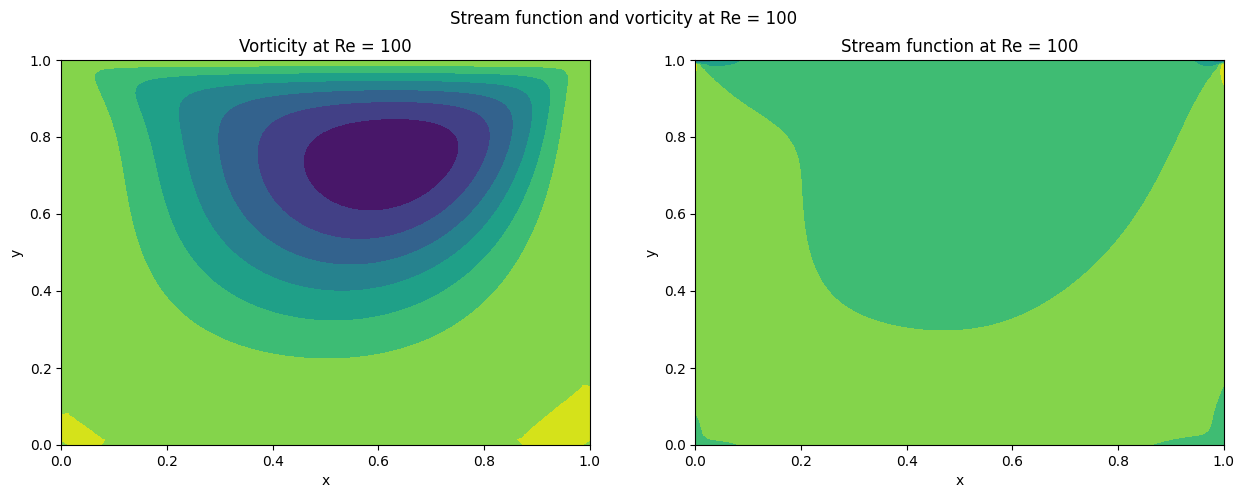

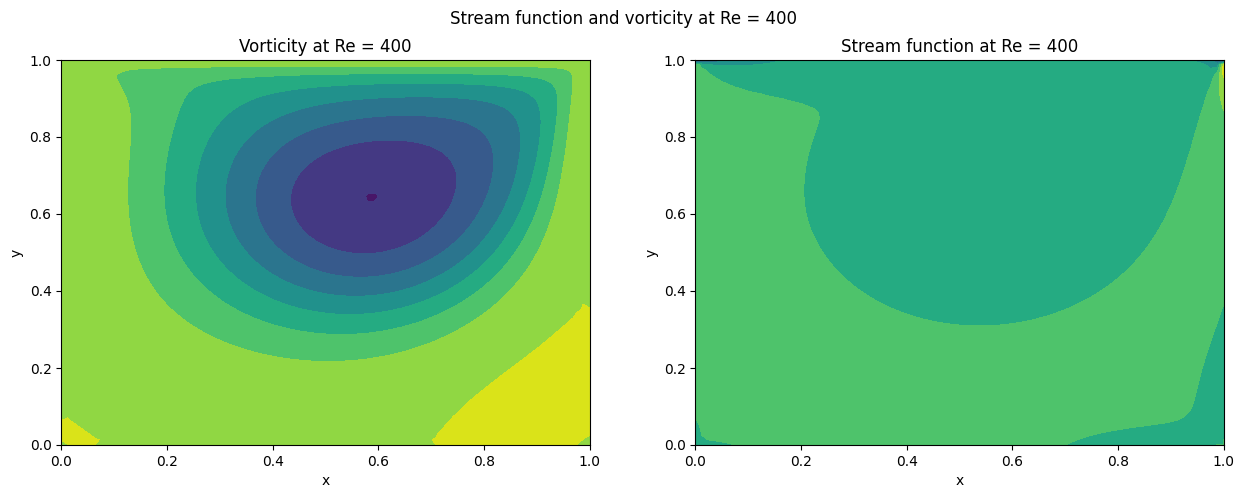

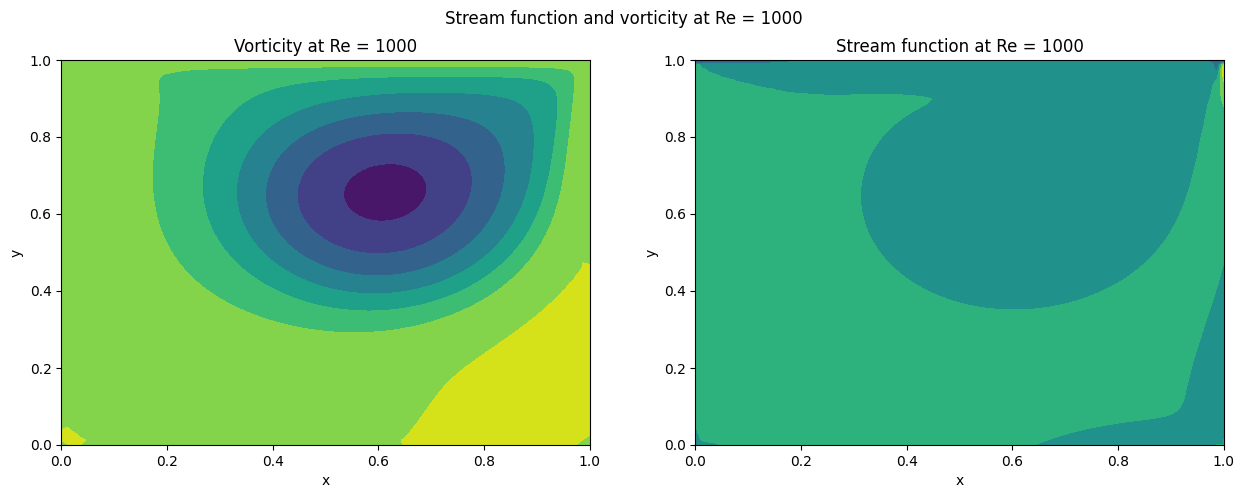

In [8]:
for i in range(len(Re)):
    plot_stream_vort(psi_out[i], vort_out[i], n, Re[i], t)

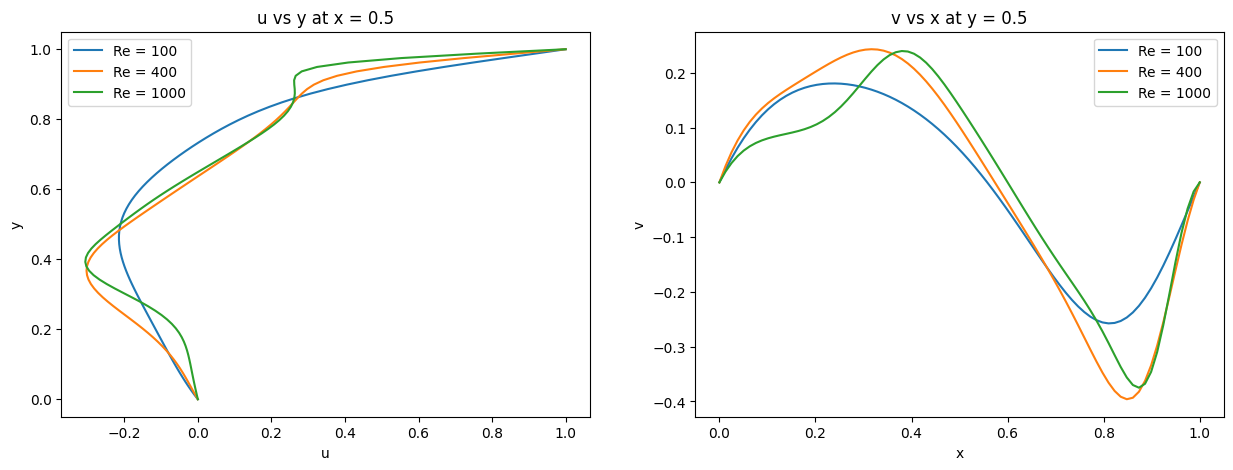

In [9]:
plot_v_vs_x_and_u_vs_y(u_out, v_out, n, Re, t)